### 8中内置的浸润方法 https://blog.csdn.net/Ayue0616/article/details/131009335

In [21]:
setwd('/import/liujing/data2/')

In [2]:
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)

Warning message:
"package 'openxlsx' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
head(data,2)

,Gene_name,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
2,ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


In [4]:
data = data[!duplicated(data$Gene_name),]

In [5]:
expr = data %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'Gene_name') 
Group = c(rep('con',31),rep('CI',43))

In [6]:
library(IOBR)

Loading required package: tibble

Warning message:
"package 'tibble' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.2.3"
Loading required package: survival

Warning message:
"package 'survival' was built under R version 4.2.3"
Loading required package: ComplexHeatmap

Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly ex

In [7]:
head(expr,2)

,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,7.70851,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,20.41526,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


In [8]:
expr_coad <- log2(expr+0.1)
expr_coad = expr
#expr_coad <- expr_coad[apply(expr_coad,1,sd)>0.5,]

In [9]:
tme_deconvolution_methods

MCPcounter               EPIC              xCell          CIBERSORT 
      "mcpcounter"             "epic"            "xcell"        "cibersort" 
CIBERSORT Absolute                IPS           ESTIMATE                SVR 
   "cibersort_abs"              "ips"         "estimate"              "svr" 
              lsei              TIMER          quanTIseq 
            "lsei"            "timer"        "quantiseq"

In [10]:
dim(expr_coad)

[1] 30983    74

In [11]:
# im_ssgsea <- deconvo_tme(eset = expr_coad,
#                         method = "xcell",
#                         arrays = F
#                         )

In [12]:
library(dplyr)

In [13]:
library(tidyverse)

cellMarker <- read.csv("/import/liujing/data/cellmarker.txt", header = F, sep = "\t") # 用EXCEL打开删除NA列
cellMarker <- cellMarker %>% column_to_rownames("V1") %>% t()

a <- cellMarker
a <- a[1:nrow(a), ]
set <- colnames(a)
geneSet <- list()
# i <- "Activated CD8 T cell"
for (i in set) {
  x <-  as.character(a[,i])
  x <- x[nchar(x)!=0]
  x <-  as.character(x)
  geneSet[[i]] <-x
}

im_ssgsea <- calculate_sig_score(eset = expr_coad, signature = geneSet , method = "ssgsea")

Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v lubridate 1.9.2     v stringr   1.5.0
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x clusterProfiler::filter() masks dplyr::filter(), stats::filter()
x dplyr::lag()              masks stats::lag()
x purrr::simplify()         masks clusterProfiler::simplify()
i Use the conflicted package (

Estimating ssGSEA scores for 28 gene sets.
[1] "Calculating ranks..."


Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."


[1] "Calculating absolute values from ranks..."
  |======================================================================| 100%

[1] "Normalizing..."


In [14]:
ssgeea = im_ssgsea

In [15]:
ssgeea$group <- Group # CIBERSORT中的数据
#ssgeea <- ssgeea %>% rownames_to_column("ID")

In [16]:
library(ggpubr)
library(ggpubr)
library(tidyr)

In [17]:
colnames(ssgeea) = gsub('_xCell','',colnames(ssgeea) )

In [18]:
a  = ssgeea

In [19]:
options(repr.plot.width = 19)

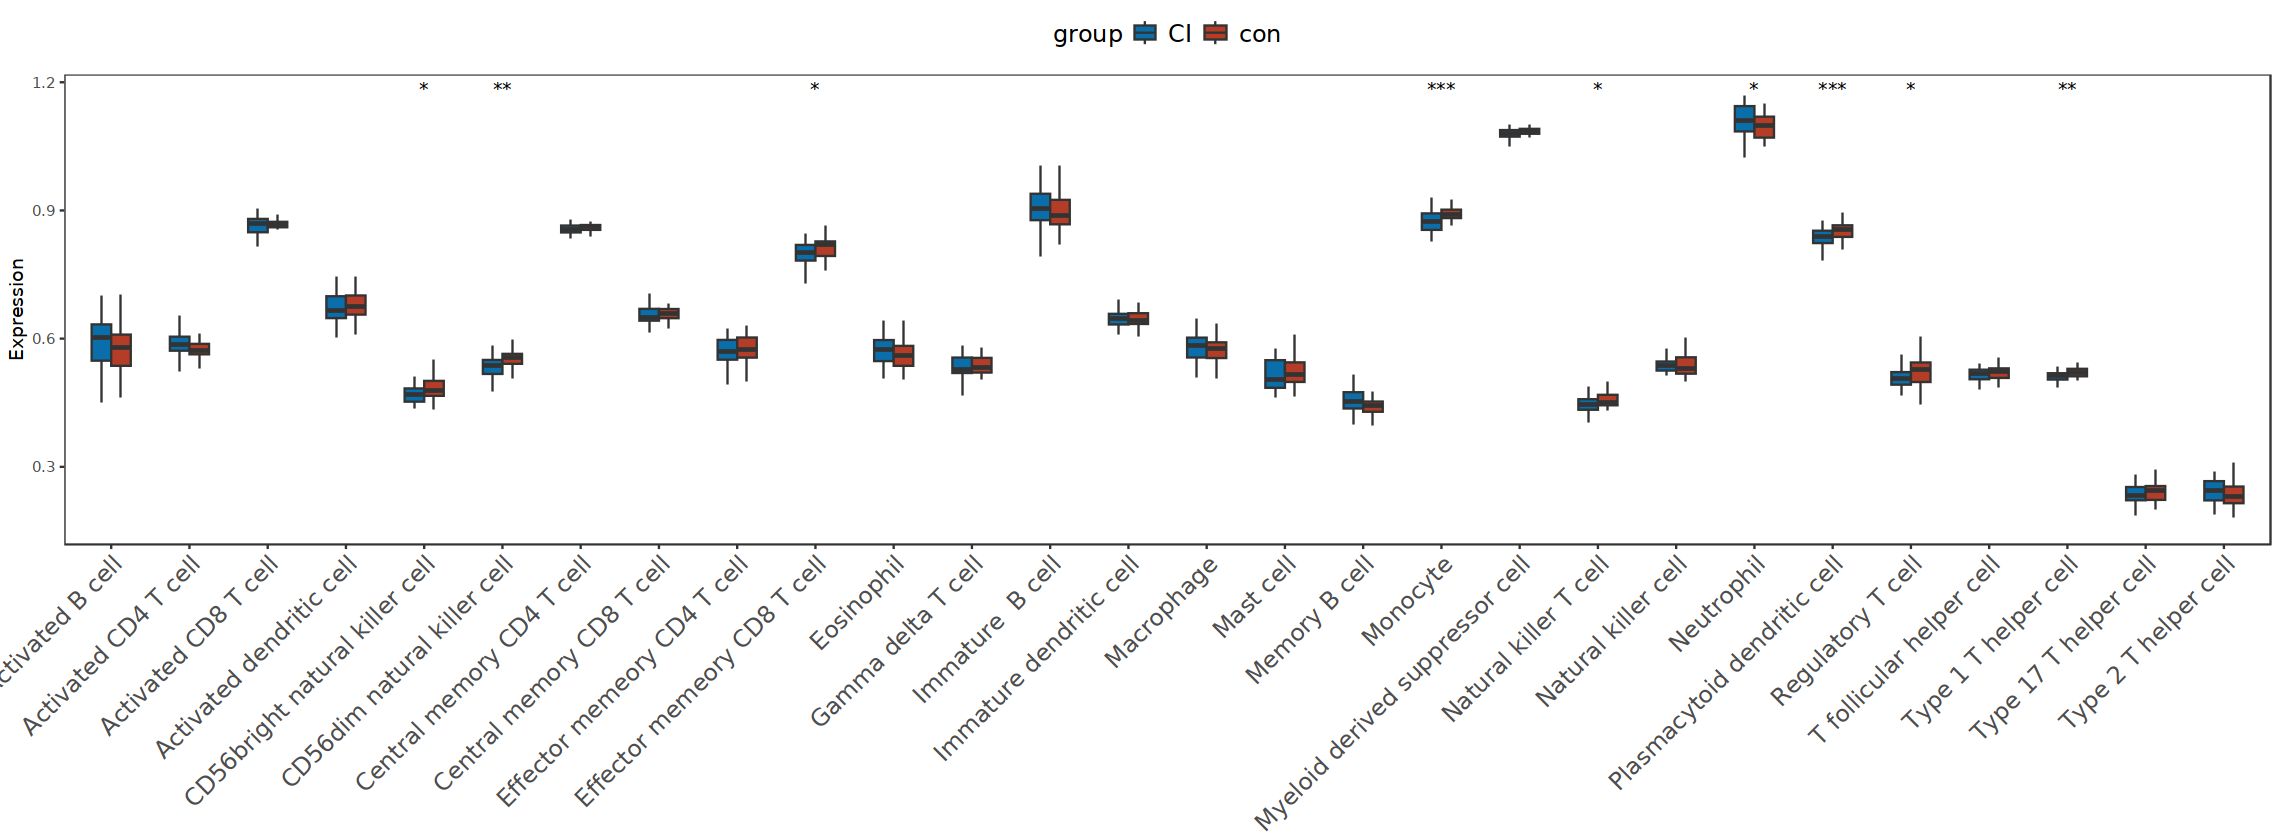

In [20]:
LUAD_ggsea <- gather(a,key = ssgsea, value = Expression, -c(group,ID)) 

ggplot(LUAD_ggsea, aes(x = ssgsea, y = Expression)) + 
  labs(y="Expression", x =  NULL) +  
  geom_boxplot(aes(fill = group), position = position_dodge(0.5), width = 0.5, outlier.alpha = 0) + 
  scale_fill_manual(values = c("#096EA9", "#B33D27")) +
  theme_bw() + 
  theme(plot.title = element_text(size = 14,color="black",hjust = 0.5), 
        axis.text.x = element_text(angle = 45, hjust = 1 ,size = 14),
        panel.grid = element_blank(),
        legend.position = "top",
        legend.text = element_text(size= 14),
        legend.title= element_text(size= 14)) + 
  stat_compare_means(aes(group =  group),
                     label = "p.signif",
                     method = "t.test",
                     hide.ns = T)